In [5]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Chi square distribution

In [6]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']

In [7]:
mymean = 100

In [8]:
df = mymean

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


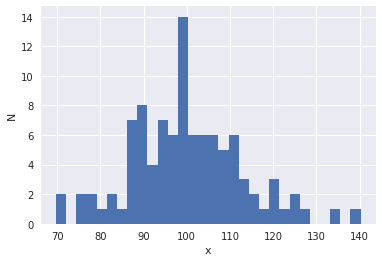

In [9]:
import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [10]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 99.97, standard deviation: 13.00


In [11]:
#mysize = (2000 / (np.array(range(1, 100)))).astype(int)
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[923 359 728 411 552 663 898 887  16  17 873 248 800 136 297 440 534 556
  32  11 896  47 533 801 390 682  59 487 225 576 241 536  58 741 573 565
 624 689 147 333 475 457 148 716 326 922  48 479 978 766 653 841 192 356
 498 516 157 188 722 543 461 544 527  60 609  90 553 927 724 837 621  95
 600 160 241 263  31 136 482 710 228 699 991 903 860 176 574 443 946 921
  61 866  14 765 885 933 105 212 150 526] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


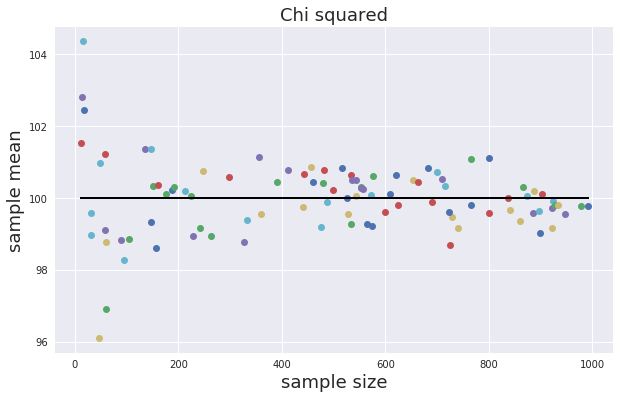

In [12]:
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 1: The plot shows sample mean against sample size. Most of the sample means are centered around the population mean of 100, and the distribution of the sample means for 100 chi-squared distributions resemples a guassian distribution, as stated by the Central Limit Theorem.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


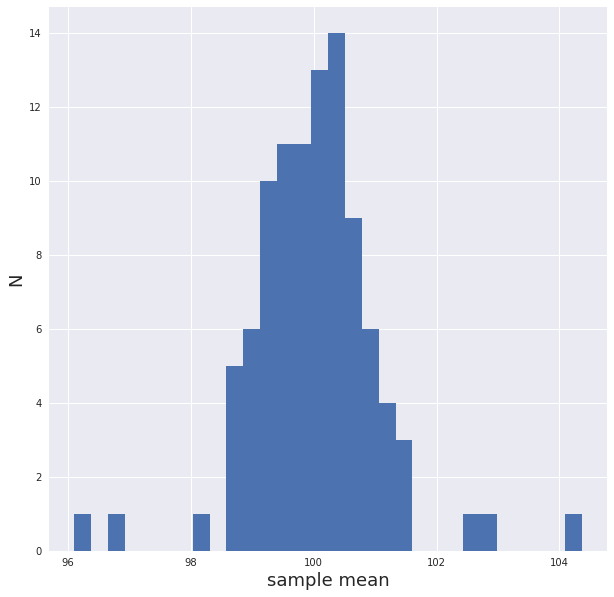

In [13]:
 allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 2: Histogram of the sample mean for 100 chi-square distributions with population mean = 100. The distribution of sample means largely follows a gaussian distribution, as stated by the Central Limit Theorem.

# Normal Distribution

In [14]:
distributions = ['norm']

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


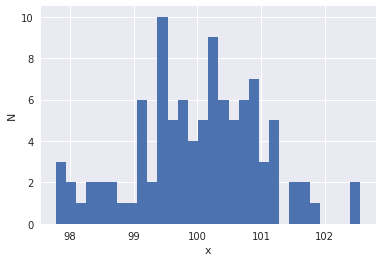

In [15]:
md = {}
# md is an empty dictionary
md['norm'] = np.random.normal(df, size=100)
pl.hist(md['norm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [16]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['norm'].mean(), md['norm'].std()))

Normal mean: 100.02, standard deviation: 1.00


In [17]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[443 577 722 444  43 184 869 804 490 146 965 792 264 110 911 998 598 438
 560 241 953 792 711 131 355 342 861  44 683 993 761 859 624 225 684 746
 788 194 444 649 541  19 921  50 247 721  44 894 844 746  52 451 947 245
 190 936 969 344 393 998 822  52 781 862 313 734 292 566  28 430 893 491
 113  76  25 188  89 487  63 304 820 490 837 480 200 862 874 534 712  72
 691 700 765 749 149  32 850 920 392 478] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


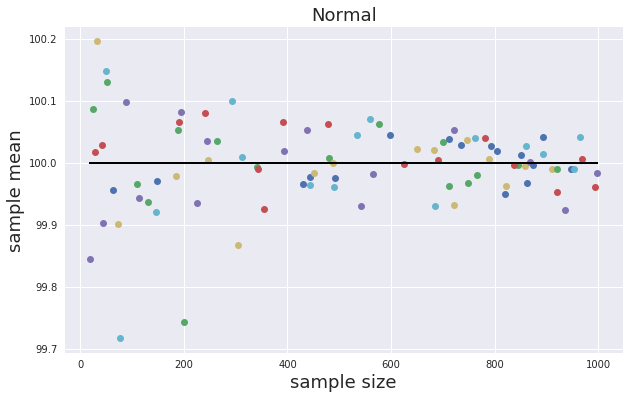

In [18]:
md['norm'] = {} 

for n in mysize:
    md['norm'][n] = np.random.normal(df, size = n)
    
md['norm']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, md['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 3: The plot shows sample mean against sample size. Most of the sample means are centered around the population mean of 100, and the distribution of the sample means for 100 guassian distributions resembles a guassian distribution, as stated by the Central Limit Theorem.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


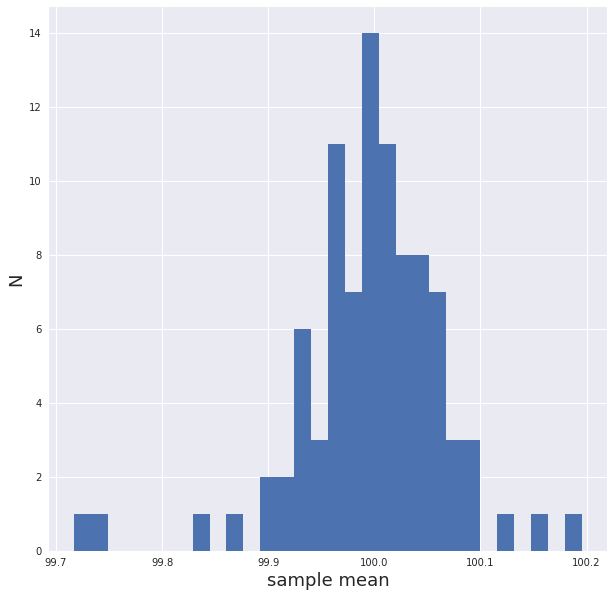

In [19]:
 allmeans = list(md['norm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 4: Histogram of the sample mean for 100 gaussian distributions with population mean = 100. The distribution of sample means largely follows a gaussian distribution, as stated by the Central Limit Theorem.

# Poisson Distribution

In [20]:
distributions = ['pois']

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


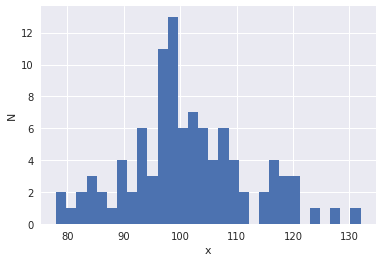

In [21]:
md = {}
md['pois'] = np.random.poisson(lam=df, size=100)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [22]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 101.14, standard deviation: 10.66


In [23]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[588 533 332 341 540 355 193 124 109 295  35 222 590  63 923 434 954  54
 544 930 113 638 600 808 994   7 452  84 373 775 219 893 566 673 703 922
 277 580 777 427 698 538 496 635 139 749 708 802 152 486 975 354 733 490
 261 302 494  40  31  42 258  34 966 246 517 218 127 321 231 461 560 342
 818  99 854 484 416 645 343 753 912 125 463 245 522 781 484 777 719 120
 821 313 927 487 533 605 537 164 584  11] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


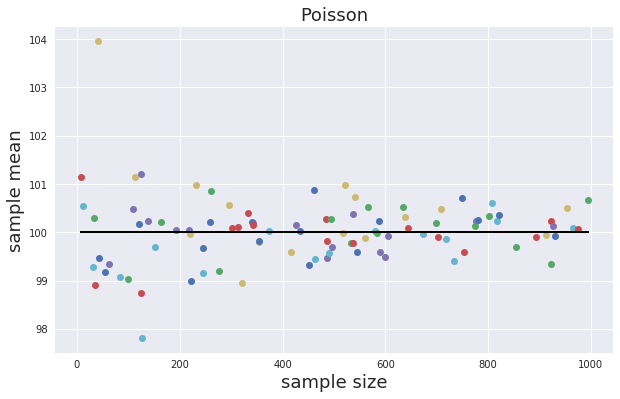

In [24]:
md['pois'] = {} 

for n in mysize:
    md['pois'][n] = np.random.poisson(lam=df, size = n)
    
md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 5: The plot shows sample mean against sample size. Most of the sample means are centered around the population mean of 100, and the distribution of the sample means for 100 poisson distributions resembles a guassian distribution, as stated by the Central Limit Theorem.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


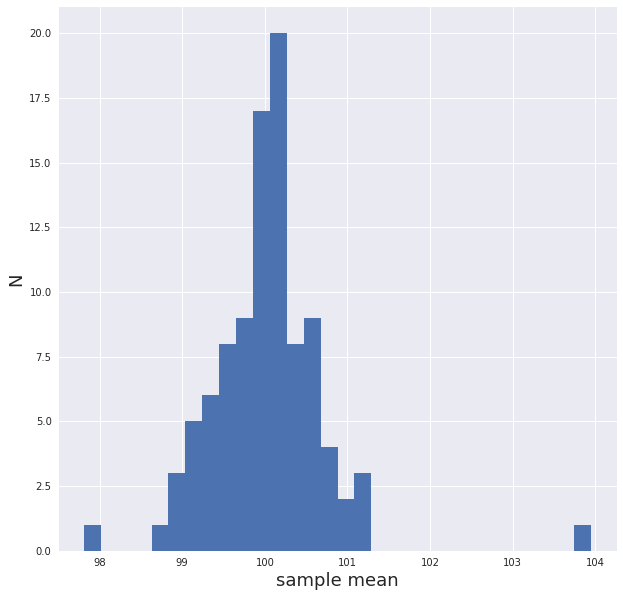

In [25]:
 allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 6: Histogram of the sample mean for 100 poisson distributions with population mean = 100. The distribution of sample means largely follows a gaussian distribution, as stated by the Central Limit Theorem.

# Binomial distribution

In [26]:
distributions = ['bino']

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


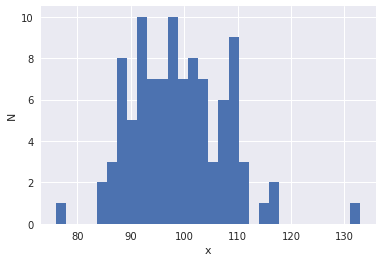

In [27]:
md = {}
md['bino'] = np.random.binomial(n=df*4, p=0.25, size=100)
pl.hist(md['bino'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [28]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['bino'].mean(), md['bino'].std()))

Binomial mean: 98.86, standard deviation: 8.69


In [29]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[816 794 254 708 976 784 670  69 315  94 249 908 803 931 359 217 567 947
 720 834 690 976 888 435 838 166 724 657 390 456 629 406 895 140 576 762
   2 748 584 462 394  95 299 233 877 736 607  74 869 118 672 373 617 361
 474 639 825 837  28  51 419  89 526  62 664   3 676 609 620 947 919 945
 102 257  75 322 984 415 528 937  52 405 323 691 543  97 695 768 278 874
 890  47  90 267  70 943 562 217 817 247] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


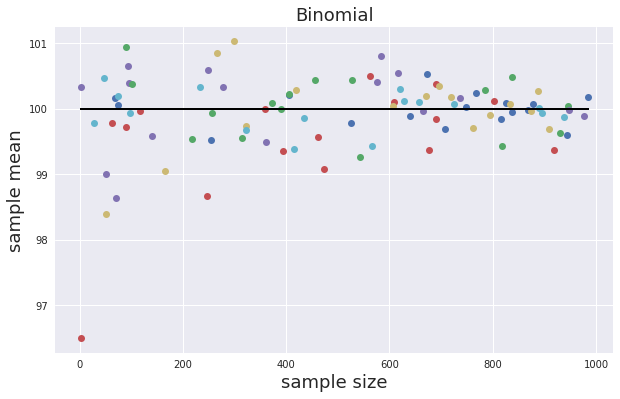

In [30]:
md['bino'] = {} 

for n in mysize:
    md['bino'][n] = np.random.binomial(n=df*4, p=0.25, size = n)
    
md['bino']['means'] = {}
axbino_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['bino']:
    if not type(nn) == str:
        md['bino']['means'][nn] = md['bino'][nn].mean()
        #and plot it
        axbino_mu_n.plot(nn, md['bino']['means'][nn], 'o')
        axbino_mu_n.set_xlabel('sample size', fontsize=18)
        axbino_mu_n.set_ylabel('sample mean', fontsize=18)
        axbino_mu_n.set_title('Binomial', fontsize=18)
        axbino_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 7: The plot shows sample mean against sample size. Most of the sample means are centered around the population mean of 100, and the distribution of the sample means for 100 binomial distributions resembles a guassian distribution, as stated by the Central Limit Theorem.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


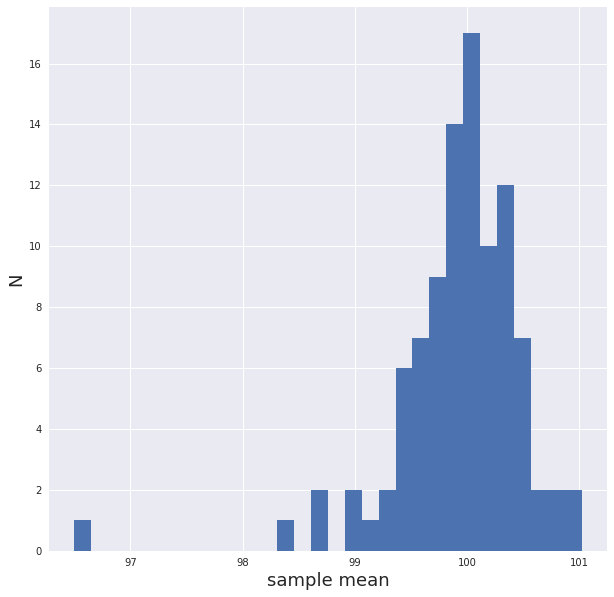

In [31]:
allmeans = list(md['bino']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 8: Histogram of the sample mean for 100 binomial distributions with population mean = 100. The distribution of sample means largely follows a gaussian distribution, as stated by the Central Limit Theorem.

# Log normal distribution

In [32]:
distributions = ['logn']

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


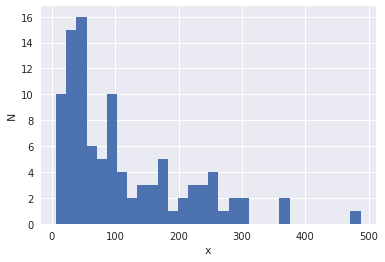

In [33]:
md = {}
md['logn'] = np.random.lognormal(mean=np.log(100)-0.5, sigma=1, size = 100)
pl.hist(md['logn'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

In [34]:
print ("Log normal mean: %.2f, standard deviation: %.2f"%(md['logn'].mean(), md['logn'].std()))

Log normal mean: 112.23, standard deviation: 96.58


In [35]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[811 589 964 696 534 398 523 754 391 598 409 515 341 396 827 523  10 573
 397 767 563 658  73 179 159 160 727 349 343  47 169 960 948 737 603 782
 485 123 319 996 921 502 677 876  46 507  80  98 312 790 268 421 336 428
 873 956 412 168 476 189 509 570 109   9 219 284 470  34 186 126 413 124
 833 907 542 869 643 425 854 845 331 518 542  94 634 291 595 539 100 234
 498 707 353 171 883 943 271 532 924 885] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


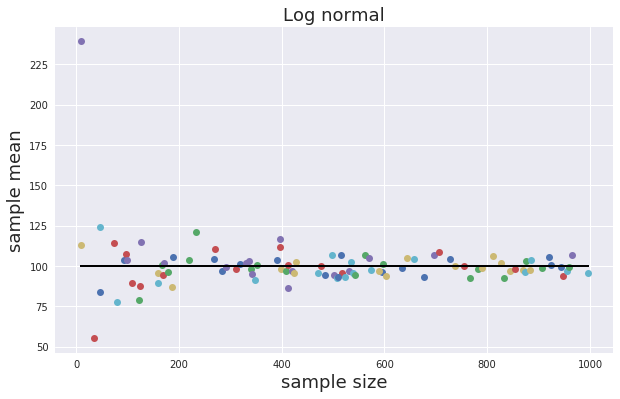

In [36]:
md['logn'] = {} 

for n in mysize:
    md['logn'][n] = np.random.lognormal(mean=np.log(100)-0.5, size = n)
    
md['logn']['means'] = {}
axlogn_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['logn']:
    if not type(nn) == str:
        md['logn']['means'][nn] = md['logn'][nn].mean()
        #and plot it
        axlogn_mu_n.plot(nn, md['logn']['means'][nn], 'o')
        axlogn_mu_n.set_xlabel('sample size', fontsize=18)
        axlogn_mu_n.set_ylabel('sample mean', fontsize=18)
        axlogn_mu_n.set_title('Log normal', fontsize=18)
        axlogn_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 9: The plot shows sample mean against sample size. Most of the sample means are centered around the population mean of 100, and the distribution of the sample means for 100 log normal distributions resembles a guassian distribution, as stated by the Central Limit Theorem.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


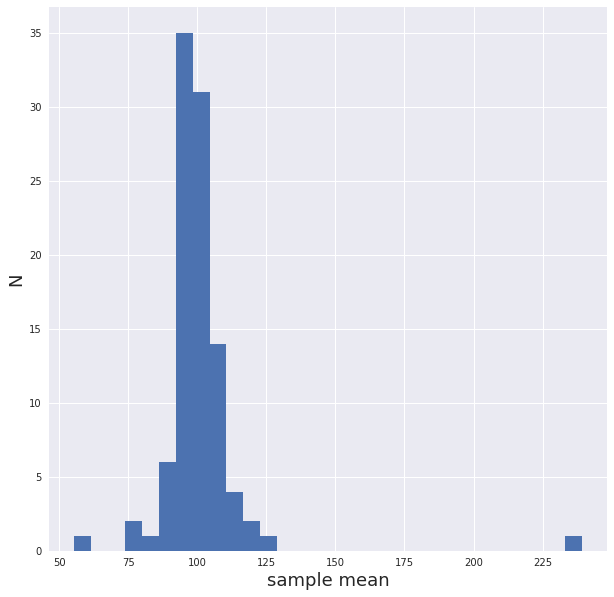

In [43]:
allmeans = list(md['logn']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 10: Histogram of the sample mean for 100 log normal distributions with population mean = 100. The distribution of sample means largely follows a gaussian distribution, as stated by the Central Limit Theorem.